In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import tqdm
import copy
import gc
import sys
import os
import f90nml
import itertools

import bokeh
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11

from bokeh.models.mappers import CategoricalColorMapper

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import scipy as sp
from scipy.sparse import linalg

import importlib

import analysis_functions

In [2]:
dataDir='.'
simDataDir='/'.join([dataDir,'test_multiReplica_MD_table'])
simDataFilename='interrior_data_table.csv'
simDataFilePath='/'.join([simDataDir,simDataFilename])
simData=pd.read_csv(simDataFilePath)
simData.head()

,Window,Rep,Time,Rst07_Z,Rst08_Z,X_Index
0,1,1,0,114.462,3.867,1
1,1,1,500,114.163,4.161,1
2,1,1,1000,113.875,4.452,1
3,1,1,1500,114.027,4.310,1
4,1,1,2000,113.790,4.512,1


In [3]:
print(simData.X_Index.unique(),
      '\n',
      simData.Window.unique())
maxWin=simData['Window'].max()
minWin=simData['Window'].min()
simData['X_Index']=simData['X_Index'].map(
        lambda x: np.clip(x,minWin,maxWin)-minWin)
simData['Window']=simData['Window']-minWin
print('--- --- ---')
print(simData.X_Index.unique(),
      '\n',
      simData.Window.unique())

[ 1  2  0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57] 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56]
--- --- ---
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]


In [4]:
testWin=0
testRep=1
tempDat=simData[(simData['Window']==testWin) & \
        (simData['Rep']==testRep)]
tempDat.head()

,Window,Rep,Time,Rst07_Z,Rst08_Z,X_Index
0,0,1,0,114.462,3.867,0
1,0,1,500,114.163,4.161,0
2,0,1,1000,113.875,4.452,0
3,0,1,1500,114.027,4.310,0
4,0,1,2000,113.790,4.512,0


In [5]:
tempCols=[]
tempCols.append('Window')
tempCols.append(None)

In [6]:
importlib.reload(analysis_functions)

analysisFrame=analysis_functions.add_indexed_milestoning_analysis_columns(
    simData,
    windowColumn='Window',xIndexColumn='X_Index',
    repColumn='Rep',groupingColumn=None,verbose=True,verboseLevel=1)
analysisFrame.head()

/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simData[groupingCol]=0
/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simData[repCol]=milestoneData[repCol]
/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

--- --- --- Grouping Name: 0 --- --- ---
	binSet: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] ; deltaVal: 1
	--- --- Window Name: 0 --- ---
		--- Replica Name: 1 

/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  repData['Escape_Vector']=binVec-deltaVal
/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:497: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  repData['Reentry_Vector']=reentryVec-deltaVal


---
	--- --- ------ --- ---
	--- --- Window Name: 1 --- ---
		--- Replica Name: 1 2 3 4 5 6 7 ---
	--- --- ------ --- ---
	--- --- Window Name: 2 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 3 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 4 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 5 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 6 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 7 --- ---
		--- Replica Name: 1 3 4 5 ---
	--- --- ------ --- ---
	--- --- Window Name: 8 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 9 --- ---
		--- Replica Name: 1 2 3 4 5 ---
	--- --- ------ --- ---
	--- --- Window Name: 10 --- ---
		--- Replica Name: 1 2 3 4 5 ---
	--- --- ------ --- ---
	--- --- Window Name: 11 --- ---
		--- Replica Name: 1 2 3 4 5 ---
	--- --- ------ --- ---
	--- --- Window Name: 12 -

,Window,X_Index,Group,Rep,Frame,Escape_Vector,Reentry_Vector
0,0,0,0,1,0,0,-1
1,0,0,0,1,1,0,-1
2,0,0,0,1,2,0,-1
3,0,0,0,1,3,0,-1
4,0,0,0,1,4,0,-1


In [ ]:
importlib.reload(analysis_functions)
analysis_functions.compute_bin_escape_counts(
    testWin,tempDat['X_Index'],
)

In [ ]:
importlib.reload(analysis_functions)
simGroups=simData.groupby(['Window','Rep'])

for simGroup in simGroups:
    groupWin,groupRep=simGroup[0]
    print('groupWin:',groupWin,'; groupRep:',groupRep,
          '\n\tescapeData:',
          analysis_functions.compute_bin_escape_counts(
              groupWin,simGroup[1]['X_Index']),
          '\n--- --- ---')

In [93]:
importlib.reload(analysis_functions)

winGroups=simData.groupby(['Window'])

binSet=np.sort(np.unique(np.concatenate([
    simData['Window'].unique(),
    simData['X_Index'].unique()
])))
nBins=len(binSet)
binMap={}
for iBin,binName in enumerate(binSet):
    binMap[binName]=iBin

escapeMat=sp.sparse.lil_matrix((nBins,nBins))
countArray=np.zeros(nBins,dtype=int)

for winGroup in winGroups:
    groupWin=winGroup[0]
    iWin=binMap[groupWin]
    print('Window:',groupWin)
    repGroups=winGroup[1].groupby(['Rep'])
    print('---')
    for repGroup in repGroups:
        groupRep=repGroup[0]
        print('Rep:',groupRep)
        repEscapeData=analysis_functions.compute_bin_escape_counts(
                      groupWin,repGroup[1]['X_Index'],
                      binSet=binSet,
                      giveBinVec=True,
                      giveDeltaVal=True,
                      giveBinT=True)
        print('\tescapeData:',
              repEscapeData,
              '\n---')
        countArray[iWin]+=repEscapeData['count']
        for escapeBinName,escapeCount in \
            zip(repEscapeData['escapes'][0],
                repEscapeData['escapes'][1]):
            iEscapeBin=binMap[escapeBinName]
            escapeMat[iWin,iEscapeBin]+=escapeCount
    escapeMat[iWin,:]=escapeMat[iWin,:]/countArray[iWin]
    escapeMat[iWin,iWin]=1-np.sum(escapeMat[iWin,:])
    print('--- --- ---')

escapeMat=escapeMat.tocsr()
print('countArray:',countArray)
print('escapeMat:',escapeMat)


Window: 0
---
Rep: 1
	escapeData: {'count': 14912, 'escapes': (array([1]), array([434])), 'binVec': array([1, 1, 1, ..., 1, 1, 1]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---
--- --- ---
Window: 1
---
Rep: 1
	escapeData: {'count': 12850, 'escapes': (array([0, 2]), array([284, 416])), 'binVec': array([0, 2, 2, ..., 2, 2, 2]), 'binT': array([0, 0, 3, ..., 0, 0, 0]), 'deltaVal': 1} 
---
Rep: 2
	escapeData: {'count': 12844, 'escapes': (array([0, 2]), array([256, 408])), 'binVec': array([0, 0, 2, ..., 2, 2, 2]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---
Rep: 3
	escapeData: {'count': 14819, 'escapes': (array([0, 2]), array([327, 555])), 'binVec': array([0, 0, 2, ..., 2, 2, 2]), 'binT': array([0, 0, 3, ..., 0, 0, 0]), 'deltaVal': 1} 
---
Rep: 4
	escapeData: {'count': 12869, 'escapes': (array([0, 2]), array([315, 362])), 'binVec': array([0, 2, 2, ..., 2, 1, 2]), 'binT': array([0, 0, 0, ..., 0, 1, 0]), 'deltaVal': 1} 
---
Rep: 5
	escapeData: {'count': 8924, 'e

Rep: 1
	escapeData: {'count': 39365, 'escapes': (array([23, 25]), array([1360, 1152])), 'binVec': array([25, 25, 25, ..., 25, 25, 25]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---
--- --- ---
Window: 25
---
Rep: 1
	escapeData: {'count': 17346, 'escapes': (array([24, 26]), array([1525,  157])), 'binVec': array([26, 26, 26, ..., 26, 26, 26]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---
Rep: 2
	escapeData: {'count': 12913, 'escapes': (array([24, 26]), array([418,  54])), 'binVec': array([26, 26, 26, ..., 26, 26, 26]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---
Rep: 3
	escapeData: {'count': 17788, 'escapes': (array([24, 26]), array([348, 414])), 'binVec': array([26, 26, 26, ..., 26, 26, 26]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---
Rep: 4
	escapeData: {'count': 12656, 'escapes': (array([24, 26]), array([483, 465])), 'binVec': array([ 0, 26, 26, ..., 26, 26, 26]), 'binT': array([0, 0, 0, ..., 0, 0, 0]), 'deltaVal': 1} 
---

In [94]:
import seaborn as sns
import networkx as nwx

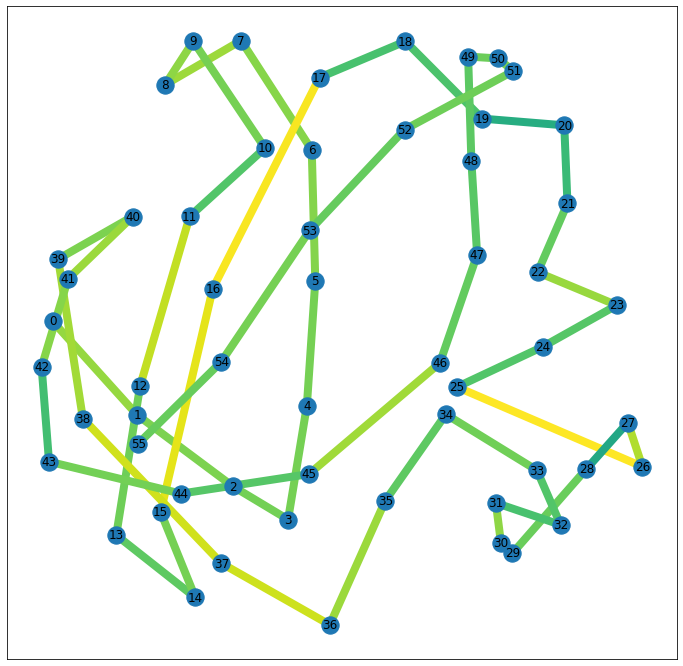

In [95]:
plt.figure(figsize=(12,12))
escapeNet=nwx.from_scipy_sparse_matrix(escapeMat)
edgeWeights=[-np.log(escapeNet.get_edge_data(*edgeTuple)['weight']) for edgeTuple in list(escapeNet.edges)]
nwx.draw_networkx(escapeNet,with_labels=True,
                  edge_color=edgeWeights,
                  width=8)
plt.show()

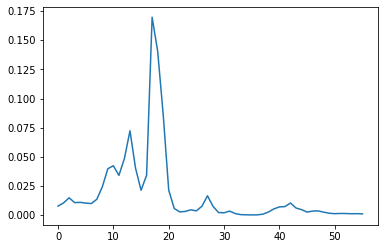

array([0.00792609, 0.01063189, 0.01499295, 0.01087963, 0.01110518,
       0.01047639, 0.01006131, 0.01371619, 0.02436673, 0.03994042,
       0.04245106, 0.03420104, 0.04887149, 0.0724319 , 0.0404929 ,
       0.02147933, 0.03431469, 0.16973767, 0.14073008, 0.08650911,
       0.02157374, 0.00583361, 0.00291758, 0.00334786, 0.00470758,
       0.00383332, 0.00777511, 0.0167279 , 0.00776236, 0.00239321,
       0.00213933, 0.00361457, 0.00151375, 0.00059213, 0.00045018,
       0.00034259, 0.0003964 , 0.00095784, 0.00276862, 0.00548726,
       0.00719951, 0.00747012, 0.01055295, 0.00626554, 0.00485859,
       0.00276046, 0.00362344, 0.00378118, 0.00270792, 0.00178114,
       0.00141669, 0.00158763, 0.00153221, 0.00135933, 0.00142134,
       0.00123097])

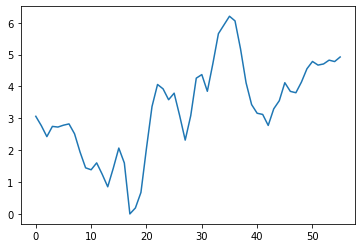

In [96]:
escapeEig=np.linalg.eig(escapeMat.todense().T)
si=np.argsort(1-escapeEig[0])
piVec=np.array(escapeEig[1])[:,si[0]]
piVec=piVec/np.sum(piVec)
plt.plot(piVec)
plt.show()
testVec=-np.log(piVec)
testVec=testVec-np.min(testVec)
plt.plot(testVec)
piVec

In [97]:
importlib.reload(analysis_functions)

escapeDataDict=analysis_functions.analyze_indexed_milestoning_escapes(
    milestoneData=simData,windowColumn='Window',xIndexColumn='X_Index',
    repColumn='Rep',groupingColumn=None,
    giveEscapeMats=True,giveCounts=True,
    giveBins=True,giveBinMaps=True,
    giveCountsMat=True)
escapeDataDict

/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wbotellosmith/Documents/Milestoning_Analysis/analysis_functions.py:646: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  binInd,xIndSeries,giveWorkingArrays=True)


Group: 0
	Window: 0 (iWin =  0 )
		Rep: 1
		count: 14912 escapes: (array([1]), array([434]))
		---
	--- ---
	Window: 1 (iWin =  1 )
		Rep: 1
		count: 12850 escapes: (array([0, 2]), array([284, 416]))
		---
		Rep: 2
		count: 12844 escapes: (array([0, 2]), array([256, 408]))
		---
		Rep: 3
		count: 14819 escapes: (array([0, 2]), array([327, 555]))
		---
		Rep: 4
		count: 12869 escapes: (array([0, 2]), array([315, 362]))
		---
		Rep: 5
		count: 8924 escapes: (array([0, 2]), array([181, 314]))
		---
		Rep: 6
		count: 3957 escapes: (array([0, 2]), array([ 98, 108]))
		---
		Rep: 7
		count: 14992 escapes: (array([0, 2]), array([302, 800]))
		---
	--- ---
	Window: 2 (iWin =  2 )
		Rep: 1
		count: 24750 escapes: (array([1, 3]), array([640, 492]))
		---
	--- ---
	Window: 3 (iWin =  3 )
		Rep: 1
		count: 4928 escapes: (array([2, 4]), array([135, 136]))
		---
	--- ---
	Window: 4 (iWin =  4 )
		Rep: 1
		count: 24707 escapes: (array([3, 5]), array([668, 633]))
		---
	--- ---
	Window: 5 (iWin =  5 )

		count: 13800 escapes: (array([31, 33]), array([542, 195]))
		---
	--- ---
	Window: 33 (iWin =  33 )
		Rep: 1
		count: 51185 escapes: (array([32, 34]), array([1849, 1093]))
		---
	--- ---
	Window: 34 (iWin =  34 )
		Rep: 1
		count: 28625 escapes: (array([33, 35]), array([804, 708]))
		---
	--- ---
	Window: 35 (iWin =  35 )
		Rep: 1
		count: 8892 escapes: (array([34, 36]), array([289, 213]))
		---
	--- ---
	Window: 36 (iWin =  36 )
		Rep: 1
		count: 8888 escapes: (array([35, 37]), array([184, 320]))
		---
	--- ---
	Window: 37 (iWin =  37 )
		Rep: 1
		count: 8859 escapes: (array([36, 38]), array([132, 375]))
		---
	--- ---
	Window: 38 (iWin =  38 )
		Rep: 1
		count: 10752 escapes: (array([37, 39]), array([ 45, 747]))
		---
		Rep: 2
		count: 10887 escapes: (array([37, 39]), array([195, 285]))
		---
		Rep: 3
		count: 10951 escapes: (array([37, 39]), array([246,  24]))
		---
		Rep: 4
		count: 10807 escapes: (array([37, 39]), array([122, 565]))
		---
		Rep: 5
		count: 10821 escapes: (array(

{0: {'bins': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55]),
  'binMap': {0: 0,
   1: 1,
   2: 2,
   3: 3,
   4: 4,
   5: 5,
   6: 6,
   7: 7,
   8: 8,
   9: 9,
   10: 10,
   11: 11,
   12: 12,
   13: 13,
   14: 14,
   15: 15,
   16: 16,
   17: 17,
   18: 18,
   19: 19,
   20: 20,
   21: 21,
   22: 22,
   23: 23,
   24: 24,
   25: 25,
   26: 26,
   27: 27,
   28: 28,
   29: 29,
   30: 30,
   31: 31,
   32: 32,
   33: 33,
   34: 34,
   35: 35,
   36: 36,
   37: 37,
   38: 38,
   39: 39,
   40: 40,
   41: 41,
   42: 42,
   43: 43,
   44: 44,
   45: 45,
   46: 46,
   47: 47,
   48: 48,
   49: 49,
   50: 50,
   51: 51,
   52: 52,
   53: 53,
   54: 54,
   55: 55},
  'escapeMatrix': <56x56 sparse matrix of type '<class 'numpy.float64'>'
  	with 166 stored elements in LInked List form

In [103]:
print(escapeDataDict[0]['escapeMatrix'])

  (0, 0)	0.9708959227467812
  (0, 1)	0.029104077253218882
  (1, 0)	0.021697126330687343
  (1, 1)	0.9418374253892068
  (1, 2)	0.03646544828010584
  (2, 1)	0.02585858585858586
  (2, 2)	0.9542626262626263
  (2, 3)	0.019878787878787878
  (3, 2)	0.02739448051948052
  (3, 3)	0.9450081168831169
  (3, 4)	0.027597402597402596
  (4, 3)	0.02703687214149836
  (4, 4)	0.9473428582992675
  (4, 5)	0.025620269559234226
  (5, 4)	0.027158001009591117
  (5, 5)	0.9493185259969712
  (5, 6)	0.02352347299343766
  (6, 5)	0.024493927125506073
  (6, 6)	0.9426113360323887
  (6, 7)	0.03289473684210526
  (7, 6)	0.024129461060540383
  (7, 7)	0.939727950131071
  (7, 8)	0.03614258880838855
  (8, 7)	0.020344899447744088
  (8, 8)	0.9424559758257789
  (8, 9)	0.037199124726477024
  (9, 8)	0.022694322830689728
  (9, 9)	0.9483241225866648
  (9, 10)	0.02898155458264552
  (10, 9)	0.02726753383722974
  (10, 10)	0.9438609597468799
  (10, 11)	0.028871506415890313
  (11, 10)	0.0358359286992247
  (11, 11)	0.9412099927108872
  (11,

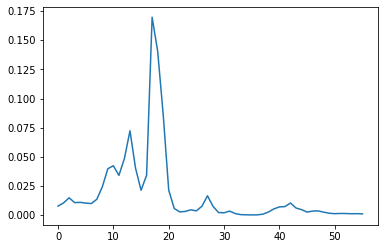

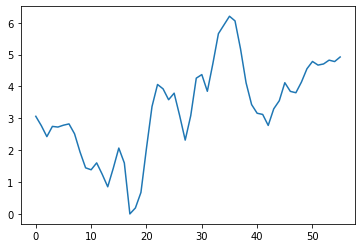

In [98]:
escapeDataDict[0]['piVector']
plt.plot(escapeDataDict[0]['piVector'])
plt.show()
tempVec=-np.log(escapeDataDict[0]['piVector'])
tempVec=tempVec-np.min(tempVec)
plt.plot(tempVec)
plt.show()

In [99]:
runVec=binT[np.nonzero(binC[1:]+binT)] 
                    runList=np.array([[int(j[0]),len(j)] for j in \
                                      [list(g) for k,g in itertools.groupby(runVec)]])
                    for iRun,run in enumerate(runList[1:]):
                        if run[0]==0:
                            rMat[iVal,np.min([runList[iRun,0]-1,xbin])]+=run[1]

IndentationError: unexpected indent (<ipython-input-99-33dbe04155c8>, line 2)

In [43]:
[list(g) for k,g in itertools.groupby([1,1,1,2,0,0,0,1,1,1,1,2,0,0])]

[[1, 1, 1], [2], [0, 0, 0], [1, 1, 1, 1], [2], [0, 0]]

In [100]:
centerBin=2

testVec=np.array([2,2,2,1,0,0,0,0,2,2,3,0,0,2,3,2,3,0,2,1,0,2,1,2,1,0,0,2])
print('testVec:',testVec)
testRuns=[list(g) for k,g in itertools.groupby(testVec)]
print('testRuns:',testRuns)

runPairs=[[run[0],len(run)] for run in testRuns]
print('runPairs:',runPairs)

lastEscape=0
reentriesList=[]
for runPair in runPairs:
    if runPair[0]==0:
        reentriesList.append([0]*runPair[1])
    elif runPair[0]==centerBin:
        reentriesList.append([lastEscape]*runPair[1])
    else:
        lastEscape=runPair[0]
        reentriesList.append([0]*runPair[1])
print('reentriesList:',reentriesList)
reentryVec=np.concatenate(reentriesList)
print('reentryVec:',reentryVec)
print('testVec:   ',testVec)

testVec: [2 2 2 1 0 0 0 0 2 2 3 0 0 2 3 2 3 0 2 1 0 2 1 2 1 0 0 2]
testRuns: [[2, 2, 2], [1], [0, 0, 0, 0], [2, 2], [3], [0, 0], [2], [3], [2], [3], [0], [2], [1], [0], [2], [1], [2], [1], [0, 0], [2]]
runPairs: [[2, 3], [1, 1], [0, 4], [2, 2], [3, 1], [0, 2], [2, 1], [3, 1], [2, 1], [3, 1], [0, 1], [2, 1], [1, 1], [0, 1], [2, 1], [1, 1], [2, 1], [1, 1], [0, 2], [2, 1]]
reentriesList: [[0, 0, 0], [0], [0, 0, 0, 0], [1, 1], [0], [0, 0], [3], [0], [3], [0], [0], [3], [0], [0], [1], [0], [1], [0], [0, 0], [1]]
reentryVec: [0 0 0 0 0 0 0 0 1 1 0 0 0 3 0 3 0 0 3 0 0 1 0 1 0 0 0 1]
testVec:    [2 2 2 1 0 0 0 0 2 2 3 0 0 2 3 2 3 0 2 1 0 2 1 2 1 0 0 2]


In [101]:
importlib.reload(analysis_functions)

testVec=np.array([2,2,2,1,1,1,1,1,2,2,3,3,3,3,2,1,2,3,3,3,2,3,2,3,3,2,1,1,2,1,2,1,1,1,2])
testReentryData=analysis_functions.compute_reentry_vector(binInd=2,xIndSeries=testVec,
                           binSet=[1,2,3],giveBins=True,
                           giveDeltaVal=True)
print('testReentryData:',testReentryData)
print('---')
print('testVec:   ',testVec)
print('reentryVec:',testReentryData[0]-testReentryData[1]['deltaVal'])

testReentryData: [array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1]), {'bins': [1, 2, 3], 'deltaVal': 0}]
---
testVec:    [2 2 2 1 1 1 1 1 2 2 3 3 3 3 2 1 2 3 3 3 2 3 2 3 3 2 1 1 2 1 2 1 1 1 2]
reentryVec: [0 0 0 0 0 0 0 1 1 1 0 0 0 3 3 1 1 0 0 3 3 3 3 0 3 3 0 1 1 1 1 0 0 1 1]


In [102]:
importlib.reload(analysis_functions)

offset=-1
testVec=np.array([2,2,2,1,1,1,1,1,2,2,3,3,3,3,2,1,2,3,3,3,2,3,2,3,3,2,1,1,2,1,2,1,1,1,2])+offset
testReentryData=analysis_functions.compute_reentry_counts(binInd=2+offset,xIndSeries=testVec,
                           binSet=[0,1,2,3,4,5],giveBins=True,
                           giveDeltaVal=True,giveReentryVec=True)
print('testReentryData:',testReentryData)
print('---')
print('testVec:   ',testVec)
print('reentryVec:',testReentryData['reentryVec']-testReentryData['deltaVal'])

testReentryData: {'count': 19, 'reentries': (array([0, 2]), array([11,  8])), 'binSet': [0, 1, 2, 3, 4, 5], 'reentryVec': array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1]), 'deltaVal': 1}
---
testVec:    [1 1 1 0 0 0 0 0 1 1 2 2 2 2 1 0 1 2 2 2 1 2 1 2 2 1 0 0 1 0 1 0 0 0 1]
reentryVec: [-1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1 -1  2  2  0  0 -1 -1  2  2  2  2 -1
  2  2 -1  0  0  0  0 -1 -1  0  0]


In [72]:
simData.head()

,Window,Rep,Time,Rst07_Z,Rst08_Z,X_Index
0,0,1,0,114.462,3.867,0
1,0,1,500,114.163,4.161,0
2,0,1,1000,113.875,4.452,0
3,0,1,1500,114.027,4.310,0
4,0,1,2000,113.790,4.512,0


In [104]:
print("Escape_Vector Values:",
      analysisFrame['Reentry_Vector'].unique(),
      "\n---\nReentry_Vector Valus:",
      analysisFrame['Reentry_Vector'].unique())

Escape_Vector Values: [-1  1  2  0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55] 
---
Reentry_Vector Valus: [-1  1  2  0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55]


testEscapeData: {'piVec': array([0.00792609, 0.01063189, 0.01499295, 0.01087963, 0.01110518,
       0.01047639, 0.01006131, 0.01371619, 0.02436673, 0.03994042,
       0.04245106, 0.03420104, 0.04887149, 0.0724319 , 0.0404929 ,
       0.02147933, 0.03431469, 0.16973767, 0.14073008, 0.08650911,
       0.02157374, 0.00583361, 0.00291758, 0.00334786, 0.00470758,
       0.00383332, 0.00777511, 0.0167279 , 0.00776236, 0.00239321,
       0.00213933, 0.00361457, 0.00151375, 0.00059213, 0.00045018,
       0.00034259, 0.0003964 , 0.00095784, 0.00276862, 0.00548726,
       0.00719951, 0.00747012, 0.01055295, 0.00626554, 0.00485859,
       0.00276046, 0.00362344, 0.00378118, 0.00270792, 0.00178114,
       0.00141669, 0.00158763, 0.00153221, 0.00135933, 0.00142134,
       0.00123097]), 'escapeMat': <56x56 sparse matrix of type '<class 'numpy.float64'>'
	with 166 stored elements in LInked List format>, 'counts': array([ 14912,  81255,  24750,   4928,  24707,   9905,   9880,  48447,
        38388,  6

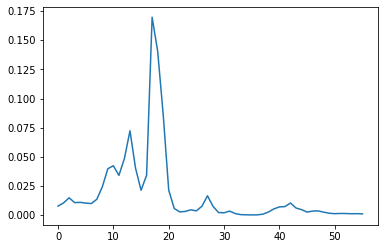

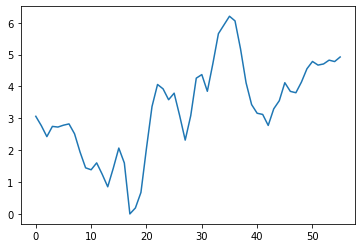

In [106]:
importlib.reload(analysis_functions)

binSet=np.sort(np.unique(np.concatenate([
    analysisFrame['Window'].unique(),
    analysisFrame['X_Index'].unique()
])))

testEscapeData=analysis_functions.compute_analysis_group_pi_vector(
    groupDataFrame=analysisFrame,windowColumn='Window',binSet=binSet,
    giveEscapeMat=True,giveCounts=True,giveBins=True,giveBinMap=True,
    giveCountsMat=True)
print('testEscapeData:',testEscapeData)
plt.plot(testEscapeData['piVec'])
plt.show()
tempVec=-np.log(testEscapeData['piVec'])
tempVec=tempVec-np.min(tempVec)
plt.plot(tempVec)
plt.show()

In [156]:
print(testEscapeData['escapeMat'])
print('--- --- ---')
print(escapeDataDict[0]['escapeMatrix'])

  (0, 0)	0.9708959227467812
  (0, 1)	0.029104077253218882
  (1, 0)	0.021697126330687343
  (1, 1)	0.9418374253892068
  (1, 2)	0.03646544828010584
  (2, 1)	0.02585858585858586
  (2, 2)	0.9542626262626263
  (2, 3)	0.019878787878787878
  (3, 2)	0.02739448051948052
  (3, 3)	0.9450081168831169
  (3, 4)	0.027597402597402596
  (4, 3)	0.02703687214149836
  (4, 4)	0.9473428582992675
  (4, 5)	0.025620269559234226
  (5, 4)	0.027158001009591117
  (5, 5)	0.9493185259969712
  (5, 6)	0.02352347299343766
  (6, 5)	0.024493927125506073
  (6, 6)	0.9426113360323887
  (6, 7)	0.03289473684210526
  (7, 6)	0.024129461060540383
  (7, 7)	0.939727950131071
  (7, 8)	0.03614258880838855
  (8, 7)	0.020344899447744088
  (8, 8)	0.9424559758257789
  (8, 9)	0.037199124726477024
  (9, 8)	0.022694322830689728
  (9, 9)	0.9483241225866648
  (9, 10)	0.02898155458264552
  (10, 9)	0.02726753383722974
  (10, 10)	0.9438609597468799
  (10, 11)	0.028871506415890313
  (11, 10)	0.0358359286992247
  (11, 11)	0.9412099927108872
  (11,

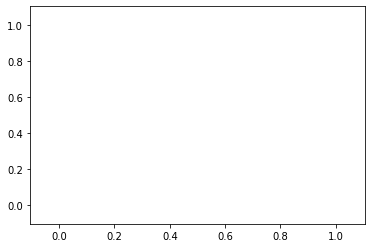

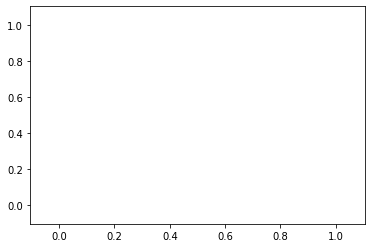

In [157]:
delMat=(testEscapeData['escapeMat'].tocsr()-\
          escapeDataDict[0]['escapeMatrix'].tocsr())
print(delMat)
delMatDense=delMat.todense()
sns.distplot(delMatDense[np.nonzero(delMatDense)],bins=100)
plt.show()
sns.distplot(np.log10(delMatDense[np.nonzero(delMatDense)]/
             testEscapeData['escapeMat'].todense()[np.nonzero(delMatDense)]),
             bins=100)
plt.show()

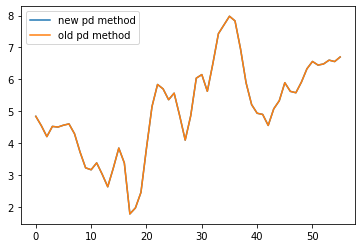

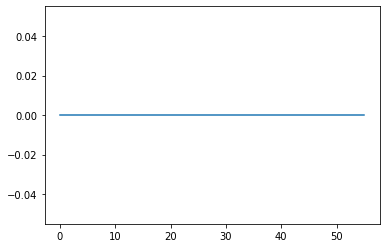

In [168]:
tempVec1=-np.log(testEscapeData['piVec'])
#tempVec1=tempVec1-np.min(tempVec1)
plt.plot(tempVec1,label='new pd method')
tempVec2=-np.log(escapeDataDict[0]['piVector'])
#tempVec2=tempVec2-np.min(tempVec2)
plt.plot(tempVec2,label='old pd method')
plt.legend()
plt.show()
plt.plot(tempVec2-tempVec1)
plt.show()

In [169]:
np.unique(tempVec2-tempVec1)

array([0.])

In [160]:
escapeDataDict[0].keys()

dict_keys(['bins', 'binMap', 'escapeMatrix', 'piVector', 'counts', 'countsMat'])

In [161]:
countsMat1=escapeDataDict[0]['countsMat']
countsMat2=testEscapeData['countsMat']
delCounts=countsMat2-countsMat1
print(delCounts)

  (0, 0)	-434.0
  (1, 1)	-4726.0
  (2, 2)	-1132.0
  (3, 3)	-271.0
  (4, 4)	-1301.0
  (5, 5)	-502.0
  (6, 6)	-567.0
  (7, 7)	-2920.0
  (8, 8)	-2209.0
  (9, 9)	-3600.0
  (10, 10)	-2555.0
  (11, 11)	-4436.0
  (12, 12)	-4068.0
  (13, 13)	-3629.0
  (14, 14)	-1798.0
  (15, 15)	-2518.0
  (16, 16)	-1249.0
  (17, 17)	-1244.0
  (18, 18)	-2335.0
  (19, 19)	-5783.0
  (20, 20)	-17782.0
  (21, 21)	-2653.0
  (22, 22)	-1311.0
  (23, 23)	-1296.0
  (24, 24)	-2512.0
  :	:
  (31, 31)	-1126.0
  (32, 32)	-737.0
  (33, 33)	-2942.0
  (34, 34)	-1512.0
  (35, 35)	-502.0
  (36, 36)	-504.0
  (37, 37)	-507.0
  (38, 38)	-2901.0
  (39, 39)	-733.0
  (40, 40)	-882.0
  (41, 41)	-1294.0
  (42, 42)	-433.0
  (43, 43)	-558.0
  (44, 44)	-420.0
  (45, 45)	-543.0
  (46, 46)	-468.0
  (47, 47)	-1041.0
  (48, 48)	-1600.0
  (49, 49)	-779.0
  (50, 50)	-523.0
  (51, 51)	-478.0
  (52, 52)	-2537.0
  (53, 53)	-585.0
  (54, 54)	-525.0
  (55, 55)	-149.0


In [162]:
print(countsMat2)

  (0, 0)	14478.0
  (0, 1)	434.0
  (1, 0)	1763.0
  (1, 1)	76529.0
  (1, 2)	2963.0
  (2, 1)	640.0
  (2, 2)	23618.0
  (2, 3)	492.0
  (3, 2)	135.0
  (3, 3)	4657.0
  (3, 4)	136.0
  (4, 3)	668.0
  (4, 4)	23406.0
  (4, 5)	633.0
  (5, 4)	269.0
  (5, 5)	9403.0
  (5, 6)	233.0
  (6, 5)	242.0
  (6, 6)	9313.0
  (6, 7)	325.0
  (7, 6)	1169.0
  (7, 7)	45527.0
  (7, 8)	1751.0
  (8, 7)	781.0
  (8, 8)	36179.0
  (8, 9)	1428.0
  (9, 8)	1581.0
  (9, 9)	66065.0
  (9, 10)	2019.0
  (10, 9)	1241.0
  (10, 10)	42957.0
  (10, 11)	1314.0
  (11, 10)	2704.0
  (11, 11)	71019.0
  (11, 12)	1732.0
  (12, 11)	1125.0
  (12, 12)	65966.0
  (12, 13)	2943.0
  (13, 12)	2212.0
  (13, 13)	74386.0
  (13, 14)	1417.0
  (14, 13)	1250.0
  (14, 14)	36676.0
  (14, 15)	548.0
  (15, 14)	1432.0
  (15, 15)	50812.0
  (15, 16)	1086.0
  (16, 15)	237.0
  (16, 16)	17344.0
  (16, 17)	1012.0
  (17, 16)	316.0
  (17, 17)	27474.0
  (17, 18)	928.0
  (18, 17)	1460.0
  (18, 18)	35125.0
  (18, 19)	875.0
  (19, 18)	4197.0
  (19, 19)	104669.0
  (19, 20)	15

In [163]:
print(countsMat1)

  (0, 0)	14912.0
  (0, 1)	434.0
  (1, 0)	1763.0
  (1, 1)	81255.0
  (1, 2)	2963.0
  (2, 1)	640.0
  (2, 2)	24750.0
  (2, 3)	492.0
  (3, 2)	135.0
  (3, 3)	4928.0
  (3, 4)	136.0
  (4, 3)	668.0
  (4, 4)	24707.0
  (4, 5)	633.0
  (5, 4)	269.0
  (5, 5)	9905.0
  (5, 6)	233.0
  (6, 5)	242.0
  (6, 6)	9880.0
  (6, 7)	325.0
  (7, 6)	1169.0
  (7, 7)	48447.0
  (7, 8)	1751.0
  (8, 7)	781.0
  (8, 8)	38388.0
  (8, 9)	1428.0
  (9, 8)	1581.0
  (9, 9)	69665.0
  (9, 10)	2019.0
  (10, 9)	1241.0
  (10, 10)	45512.0
  (10, 11)	1314.0
  (11, 10)	2704.0
  (11, 11)	75455.0
  (11, 12)	1732.0
  (12, 11)	1125.0
  (12, 12)	70034.0
  (12, 13)	2943.0
  (13, 12)	2212.0
  (13, 13)	78015.0
  (13, 14)	1417.0
  (14, 13)	1250.0
  (14, 14)	38474.0
  (14, 15)	548.0
  (15, 14)	1432.0
  (15, 15)	53330.0
  (15, 16)	1086.0
  (16, 15)	237.0
  (16, 16)	18593.0
  (16, 17)	1012.0
  (17, 16)	316.0
  (17, 17)	28718.0
  (17, 18)	928.0
  (18, 17)	1460.0
  (18, 18)	37460.0
  (18, 19)	875.0
  (19, 18)	4197.0
  (19, 19)	110452.0
  (19, 20)	15

In [164]:
for windowGroup in analysisFrame.groupby(['Window']):
    print(windowGroup[1].head())

   Window  X_Index  Group  Rep  Escape_Vector  Reentry_Vector
0       0        0      0    1              0              -1
1       0        0      0    1              0              -1
2       0        0      0    1              0              -1
3       0        0      0    1              0              -1
4       0        0      0    1              0              -1
       Window  X_Index  Group  Rep  Escape_Vector  Reentry_Vector
15000       1        2      0    1             -1               2
15001       1        1      0    1              1               2
15002       1        1      0    1              1               2
15003       1        2      0    1              2               2
15004       1        1      0    1              1               2
       Window  X_Index  Group  Rep  Escape_Vector  Reentry_Vector
97300       2        2      0    1              2              -1
97301       2        1      0    1              1               1
97302       2        2      0    1

In [170]:
?sp.sparse.lil_matrix

In [177]:
tempN=10
tempMat=np.zeros((tempN,tempN))-1
print(tempMat)
print ('---')
for ii in np.arange(tempN-1):
    for jj in np.arange(ii+1,tempN):
        tempMat[ii,jj]=ii+(tempN-1)*(jj-1)
print(tempMat)
print('---')
tempInds=np.nonzero(tempMat>-1)
tempPairMap=np.array([
    [iPair[0],iPair[1]] for iPair in \
    zip(tempInds[0],tempInds[1])
])
print(tempPairMap)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
---
[[-1.  0.  9. 18. 27. 36. 45. 54. 63. 72.]
 [-1. -1. 10. 19. 28. 37. 46. 55. 64. 73.]
 [-1. -1. -1. 20. 29. 38. 47. 56. 65. 74.]
 [-1. -1. -1. -1. 30. 39. 48. 57. 66. 75.]
 [-1. -1. -1. -1. -1. 40. 49. 58. 67. 76.]
 [-1. -1. -1. -1. -1. -1. 50. 59. 68. 77.]
 [-1. -1. -1. -1. -1. -1. -1. 60. 69. 78.]
 [-1. -1. -1. -1. -1. -1. -1. -1. 70. 79.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. 80.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
---
[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 3]
 [2 

In [180]:
binAr=np.arange(-1,5)
tempAr=np.array([1,3,6,7,1,2,0,-2,-2,-2,1,4])
np.isin(tempAr,binAr)

array([ True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True])

In [88]:
importlib.reload(analysis_functions)

#tempXvec=np.random.randint(low=0,high=8,size=20)
tempXvec=np.array([1,2,1,1,0,3,4,3,3,3,3,4,4,3,3,0,3,3,4,4,3,3,0,0,1,3,6,3,3,3,3,3,2,6,6,7,3,7])
print('tempXvec:',tempXvec)
tempIndCounts=np.unique(tempXvec,return_counts=True)
tempInd=tempIndCounts[0][np.argmax(tempIndCounts[1])]
print('tempInd:',tempInd)
tempBinSet=tempIndCounts[0]
print('tempBinSet:',tempBinSet)
tempBinInfo=analysis_functions.build_bin_mappings(binSet=tempBinSet)
print('tempBinInfo:',tempBinInfo)
tempEdgeInfo=analysis_functions.build_edge_mappings(len(tempBinSet))
print('tempEdgeInfo:',tempEdgeInfo)
tempEscData=analysis_functions.compute_bin_vector(
    binInd=tempInd,xIndSeries=tempXvec,binSet=tempBinSet,giveBins=True,giveDeltaVal=True)
print('tempEscData:',tempEscData)
tempEscVec=tempEscData[0]-tempEscData[1]['deltaVal']
print('tempEscVec:',tempEscVec)
tempReVecData=analysis_functions.compute_reentry_vector(
    binInd=tempInd,xIndSeries=tempXvec,binSet=tempBinSet,
    giveBins=True,giveDeltaVal=True,verbose=False)
print('tempReVecData',tempReVecData)
tempReVec=tempReVecData[0]-tempReVecData[1]['deltaVal']
print('tempReVec:',tempReVec)
tempComp=np.zeros((len(tempXvec),3))
tempComp[:,0]=tempXvec
tempComp[:,1]=tempEscVec
tempComp[:,2]=tempReVec
print('vecCompare:')
print(tempComp)
tempTransInfo=analysis_functions.compute_bin_edge_transitions(
    binInd=tempInd,escapeVec=tempEscVec[1:],reentryVec=tempReVec[:-1],
    binSet=tempBinSet,edgeMaps=tempEdgeInfo,
    giveBins=False,giveBinMap=False,giveEdgeMaps=False,verbose=True)
print('tempTransInfo:')
for entryKey in tempTransInfo:
    print(entryKey,tempTransInfo[entryKey])

tempXvec: [1 2 1 1 0 3 4 3 3 3 3 4 4 3 3 0 3 3 4 4 3 3 0 0 1 3 6 3 3 3 3 3 2 6 6 7 3
 7]
tempInd: 3
tempBinSet: [0 1 2 3 4 6 7]
tempBinInfo: {'bins': array([0, 1, 2, 3, 4, 6, 7]), 'binSortArr': array([0, 1, 2, 3, 4, 5, 6]), 'binMap': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6}, 'binSetMap': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6}}
tempEdgeInfo: {'edgeIndToPair': array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 5],
       [4, 6],
       [5, 6]]), 'edgePairToInd': array([[-1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-1., -1.,  6.,  7.,  8.,  9., 10.],
       [-1., -1., -1., 11., 12., 13., 14.],
       [-1., -1., -1., -1., 15., 16., 17.],
       [-1., -1., -1., -1., -1., 18., 19.],
       [-1., -1., -1., -1., -1., -1., 20.],
       [-1., -1., -1., -1., -1., -1

In [7]:
binSet=np.unique(np.concatenate([
    analysisFrame['Window'].unique(),
    analysisFrame['X_Index'].unique()
]))
print(binSet)
binInfo=analysis_functions.build_bin_mappings(binSet)
print(binInfo)
edgeInfo=analysis_functions.build_edge_mappings(len(binSet))
print(edgeInfo)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
{'bins': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), 'binSortArr': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), 'binMap': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38

In [578]:
analysis_functions.compute_analysis_group_pi_vector(
    groupDataFrame=analysisFrame,windowColumn='Window',binSet=binSet,
                                     giveBins=False,giveBinMap=False,
                                     giveEscapeMat=False,giveCounts=False,
                                     giveCountsMat=False)

array([0.00812903, 0.01057776, 0.01511342, 0.01086068, 0.01111323,
       0.01050585, 0.01001832, 0.0136158 , 0.0242586 , 0.04001078,
       0.04232569, 0.03400426, 0.04862664, 0.07295423, 0.04077567,
       0.02161837, 0.03381329, 0.17153528, 0.13939366, 0.08659919,
       0.02119668, 0.00578531, 0.00291126, 0.00329048, 0.00465552,
       0.00381745, 0.00780817, 0.01681475, 0.0075886 , 0.00240749,
       0.0021267 , 0.00366874, 0.00151365, 0.00058954, 0.00045042,
       0.00034146, 0.000395  , 0.00095391, 0.00276815, 0.00548904,
       0.00724842, 0.00746055, 0.01060384, 0.00620195, 0.00489073,
       0.0027375 , 0.00362675, 0.00377277, 0.00270073, 0.00177573,
       0.00140863, 0.00158716, 0.00152848, 0.00135121, 0.001422  ,
       0.00126146])

In [8]:
importlib.reload(analysis_functions)
QdataDict=analysis_functions.compute_analysis_group_Qdata(
    groupDataFrame=analysisFrame,windowColumn='Window',binSet=binSet,
                                     giveBins=False,giveBinMap=False,
                                     giveEscapeMat=True,giveCounts=False,
                                     giveCountsMat=False,givePiVec=True)
for entryKey in QdataDict:
    print(entryKey,':',QdataDict[entryKey])

Computing R and N: ( 0 : 1 ) ( 1 : 1 2 3 4 5 6 7 ) ( 2 : 1 ) ( 3 : 1 ) ( 4 : 1 ) ( 5 : 1 ) ( 6 : 1 ) ( 7 : 1 3 4 5 ) ( 8 : 1 ) ( 9 : 1 2 3 4 5 ) ( 10 : 1 2 3 4 5 ) ( 11 : 1 2 3 4 5 ) ( 12 : 1 2 3 4 5 ) ( 13 : 1 2 3 4 5 ) ( 14 : 1 ) ( 15 : 1 ) ( 16 : 1 ) ( 17 : 1 ) ( 18 : 1 2 3 4 ) ( 19 : 1 2 3 4 5 6 7 ) ( 20 : 1 2 3 4 5 6 7 8 9 10 11 ) ( 21 : 1 ) ( 22 : 1 ) ( 23 : 1 ) ( 24 : 1 ) ( 25 : 1 2 3 4 5 6 7 ) ( 26 : 1 ) ( 27 : 1 2 3 4 5 ) ( 28 : 1 2 3 4 5 ) ( 29 : 1 2 3 ) ( 30 : 1 2 ) ( 31 : 1 ) ( 32 : 1 ) ( 33 : 1 ) ( 34 : 1 ) ( 35 : 1 ) ( 36 : 1 ) ( 37 : 1 ) ( 38 : 1 2 3 4 5 ) ( 39 : 1 ) ( 40 : 1 ) ( 41 : 1 ) ( 42 : 1 ) ( 43 : 1 ) ( 44 : 1 ) ( 45 : 1 ) ( 46 : 1 ) ( 47 : 1 ) ( 48 : 1 ) ( 49 : 1 ) ( 50 : 1 ) ( 51 : 1 ) ( 52 : 1 2 3 4 5 6 7 ) ( 53 : 1 ) ( 54 : 1 ) ( 55 : 1 ) 
[0 1]
[1 2]
[2 3]
[3 4]
[4 5]
[5 6]
[6 7]
[7 8]
[8 9]
[ 9 10]
[10 11]
[11 12]
[12 13]
[13 14]
[14 15]
[15 16]
[16 17]
[17 18]
[18 19]
[19 20]
[20 21]
[21 22]
[22 23]
[23 24]
[24 25]
[25 26]
[26 27]
[27 28]
[28 29]
[29 30]


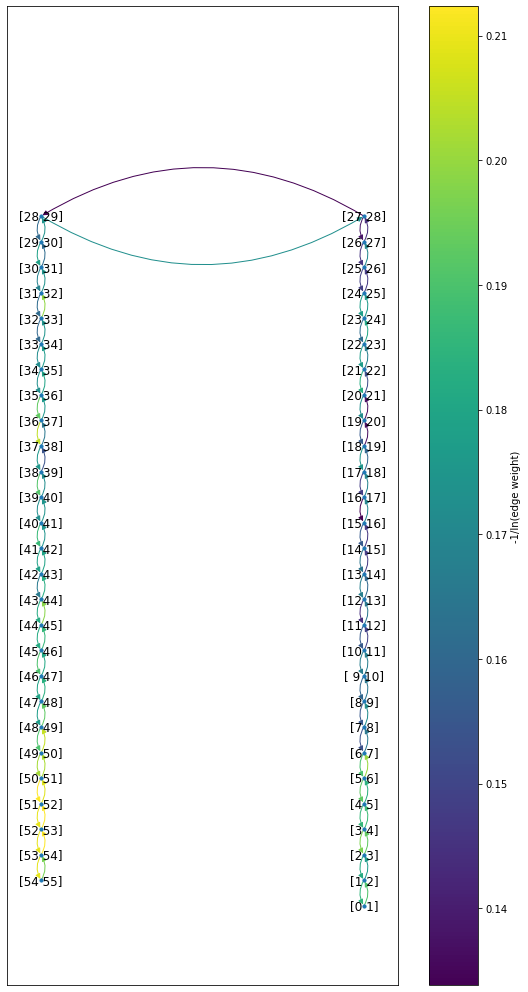

In [537]:
#Plot network depiction of Q matrix
Qnet=nwx.from_scipy_sparse_matrix(QdataDict['Qmat'],create_using=nwx.DiGraph)

edges,weights = zip(*nwx.get_edge_attributes(Qnet,'weight').items());

eIndToPair=edgeInfo['edgeIndToPair'];

nodeSet=list(np.unique(np.array(edges).flatten()));
nodeLabels={node_i:str(eIndToPair[node_i]) for node_i in nodeSet};

edge_labels=dict([((u,v,),'{:.3f}'.format(1/-np.log(d['weight'])))
             for u,v,d in Qnet.edges(data=True)]);

#pos=nwx.planar_layout(Qnet)

nNodes=len(nodeSet);
nX=int(np.sqrt(nNodes));
pos={nodeInd:np.array([.5-int(iNode/(nNodes/2)),
                       iNode/nNodes if iNode<(nNodes/2) \
                       else 1-iNode/nNodes]) \
                      for iNode,nodeInd in enumerate(nodeSet)};

fig=plt.figure(figsize=(14,18))
edge_colors=1/-np.log(weights)
nwx.draw_networkx(Qnet,pos,node_size=10,
                  nodelist=nodeSet,labels=nodeLabels,
                  edge_labels=edge_labels,
                  connectionstyle='arc3, rad=0.3',
                  edgelist=edges, edge_color=edge_colors,
                  width=1,arrows=True)
cbar=fig.colorbar(
    matplotlib.cm.ScalarMappable(
        norm = matplotlib.colors.Normalize(
            vmin=np.min(edge_colors), vmax=np.max(edge_colors))),
                  fraction=0.46, pad=0.04)
cbar.set_label('-1/ln(edge weight)')
plt.show()

(array([-124752.63618675, -124915.39029611, -125367.58876464,
       -125847.48957981, -126646.61785624, -127706.65197619,
       -128711.87610055, -131297.88831089, -132834.77188438,
       -134161.65352861, -135337.12958189, -138182.99093235,
       -140444.2884776 , -141645.26999111, -144658.39026171,
       -151548.8305619 , -156011.4245611 , -156921.13649027,
       -156659.06704798, -154692.04285119, -150359.85330203,
       -141866.96714643, -128341.49933679, -116560.84338479,
       -109830.69883382,  -89280.20701542,  -81146.25965973,
        -73265.76970801,  -64465.86134755,  -51351.90791051,
        -40300.24305056,  -32248.70246254,  -19740.39077914,
         22794.48764103,   69389.35570613,  121963.46538109,
        157233.78295771,  172800.12185801,  183305.90758029,
        186110.45178209,  188560.06891812,  190054.78318848,
        191113.88155971,  192419.1611002 ,  193538.13068883,
        195084.07163791,  196269.92875853,  197250.30535669,
        198163.32368562

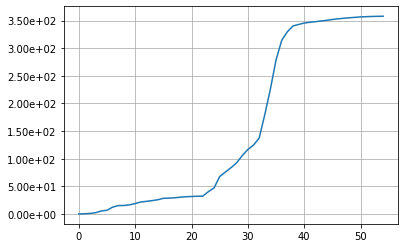

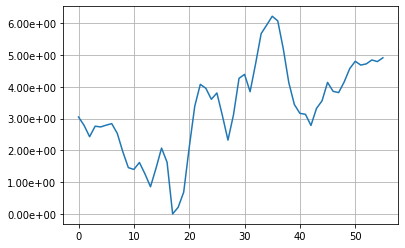

In [9]:
#Plot Tau Vector (MFPT) and PMF using full Q matrix
print(QdataDict['tauData'])
print('Qhat shape:',np.shape(QdataDict['Qhat']))
tauVec=QdataDict['tauVec']
frq=1e-3 #frame rate in ns
fig,ax=plt.subplots(1,1)
ax.plot(np.sort(tauVec-np.min(tauVec))*frq)
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2e'))
ax.grid()
plt.show()

piVec=QdataDict['piVec']
pProb=-np.log(piVec)
pProb=pProb-np.min(pProb)
fig,ax=plt.subplots(1,1)
ax.plot(pProb)
ax.grid()
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2e'))
plt.show()

(array([ 4.61182913e+02, -1.85578946e+02, -8.92466946e+02, -4.95333421e+01,
        9.44501091e+02, -1.68016142e+02, -9.25678049e+02, -7.62395859e+01,
        1.21122184e+02, -3.54589974e+02, -4.82276324e+02, -1.38837471e+02,
       -9.43399443e+01, -4.14800700e+02, -6.81734335e+02, -1.14216027e+02,
        4.63833572e+01, -3.02143323e+02, -5.66235965e+02, -1.51692492e+02,
       -9.56633945e+01, -3.73883424e+02, -2.37427048e+02,  7.61890738e+01,
       -1.48133862e+02, -1.12365857e+03, -2.93364176e+02,  1.73138892e+02,
       -1.37574117e+03, -7.70967232e+02,  9.17141996e+02,  2.05970031e+02,
       -1.98069458e+03, -1.22783469e+03,  1.84588842e+03,  1.06772523e+03,
       -1.42170721e+03, -6.07336571e+02,  6.88113858e+02, -1.60483527e+01,
       -1.00402263e+03, -2.00052426e+02,  6.01295951e+02, -1.02221440e+02,
       -8.64964345e+02, -8.18150970e+01,  5.74409587e+02, -1.77233873e+02,
       -9.74241015e+02, -7.97091066e-01,  9.23578977e+02, -1.10618916e+02,
       -1.02537677e+03, 

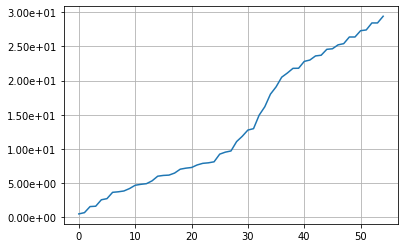

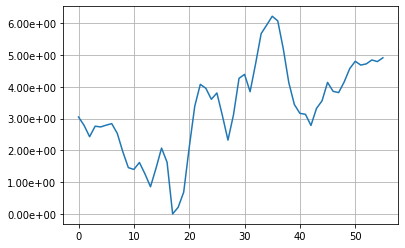

In [563]:
importlib.reload(analysis_functions)

#Plot PMF and MFPT from Q matrix with rows / columns of last milestone removed
eIndToPair=edgeInfo['edgeIndToPair']
#filterBin=np.max(binSet)
indCheckFun=lambda iRow: True #not (filterBin in eIndToPair[iRow])

Qtemp=copy.copy(QdataDict['Qmat'])
Qred,filterMap=analysis_functions.filter_matRow_entries(Qtemp,rowIndTestFun=indCheckFun)
#print(filterMap,'#filteredEntries =',len(filterMap))
#print(np.array(list(zip(filterMap,eIndToPair[filterMap]))))
#print('New Matrix Shape:',np.shape(Qred),'\n',Qred)
Qred=Qred.todense()
bvec=np.zeros(len(Qred))-1
bvec[-1]=0
tauData=np.linalg.lstsq(Qred,bvec,rcond=None)
tauVec=tauData[0]
print(tauData)
print('Qhat shape:',np.shape(Qred))

frq=1e-3 #frame rate in ns
fig,ax=plt.subplots(1,1)
ax.plot(np.cumsum(np.abs(tauVec)-np.min(np.abs(tauVec)))*frq)
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2e'))
ax.grid()
plt.show()

piVec=QdataDict['piVec']
pProb=-np.log(piVec)
pProb=pProb-np.min(pProb)
fig,ax=plt.subplots(1,1)
ax.plot(pProb)
ax.grid()
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2e'))
plt.show()

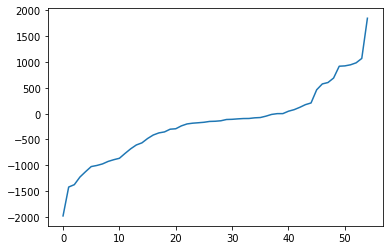

In [574]:
plt.plot(np.sort(tauVec))

In [584]:
import sklearn as skl
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

In [586]:
?resample

In [587]:
analysisFrame.head()

,Window,X_Index,Group,Rep,Frame,Escape_Vector,Reentry_Vector
0,0,0,0,1,0,0,-1
1,0,0,0,1,1,0,-1
2,0,0,0,1,2,0,-1
3,0,0,0,1,3,0,-1
4,0,0,0,1,4,0,-1


In [10]:
importlib.reload(analysis_functions)

piBootData=analysis_functions.bootstrap_analysis_group_pi_vector(
    groupDataFrame=analysisFrame,windowColumn='Window',binSet=binSet,
    bootSampleSize=75000,nBootSamples=16,repColumn=None,
    giveBins=False,giveBinMap=False,giveEscapeMat=False,giveCounts=False,
    giveCountsMat=False)
piBootData

Running sample (out of 16): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14x2, 15, 16,  


[array([0.05373619, 0.08071106, 0.08396507, 0.03917958, 0.02298259,
        0.02037647, 0.00605161, 0.01142302, 0.02390968, 0.04374924,
        0.06014706, 0.04103387, 0.04793788, 0.06630134, 0.02920221,
        0.01420168, 0.018937  , 0.08340602, 0.05308909, 0.04867354,
        0.01301973, 0.00321077, 0.00161097, 0.00195154, 0.00278169,
        0.0036979 , 0.00678347, 0.01115791, 0.00436635, 0.00180073,
        0.00136818, 0.00176275, 0.00105084, 0.0006277 , 0.00043077,
        0.00045825, 0.00078883, 0.00205097, 0.0067884 , 0.00780666,
        0.00732574, 0.01044146, 0.02066217, 0.01478544, 0.0074652 ,
        0.00270885, 0.00270885, 0.00301343, 0.00208373, 0.00121207,
        0.00105799, 0.00091676, 0.00115015, 0.00064404, 0.00091446,
        0.00038103]),
 array([0.00944609, 0.00858905, 0.0101991 , 0.00561608, 0.00560951,
        0.00336395, 0.00341431, 0.00647969, 0.01150356, 0.02296009,
        0.02663573, 0.01739052, 0.02621316, 0.0398322 , 0.02541518,
        0.0148303 , 0.0268

In [11]:
potFun=lambda piVec: -np.log(piVec)-np.min(-np.log(piVec))
potBootData=list(map(potFun,piBootData))
potBootData

[array([0.44631414, 0.03952526, 0.        , 0.7622451 , 1.29566398,
        1.41602019, 2.63007711, 1.99476993, 1.25611752, 0.6519267 ,
        0.33360843, 0.71600311, 0.56049492, 0.23619077, 1.05615637,
        1.77704031, 1.48928348, 0.00668043, 0.45842952, 0.54526529,
        1.86393501, 3.26389078, 3.95356224, 3.76178058, 3.4073423 ,
        3.12263476, 2.51591229, 2.01825216, 2.9564733 , 3.84220927,
        4.11692256, 3.86352622, 4.38081512, 4.89608819, 5.27259333,
        5.21074246, 4.66760151, 3.71209007, 2.51518537, 2.37542343,
        2.43900705, 2.08461661, 1.4020963 , 1.73675785, 2.42014885,
        3.43387581, 3.43387581, 3.32732155, 3.69624007, 4.23807153,
        4.37402717, 4.51731474, 4.29051138, 4.87039272, 4.51981944,
        5.39528817]),
 array([2.81003611, 2.90514964, 2.73333733, 3.33000405, 3.33117433,
        3.84252052, 3.8276614 , 3.18696509, 2.61298075, 1.9218798 ,
        1.77338382, 2.19971215, 1.78937553, 1.37096165, 1.82029069,
        2.35896477, 1.7671

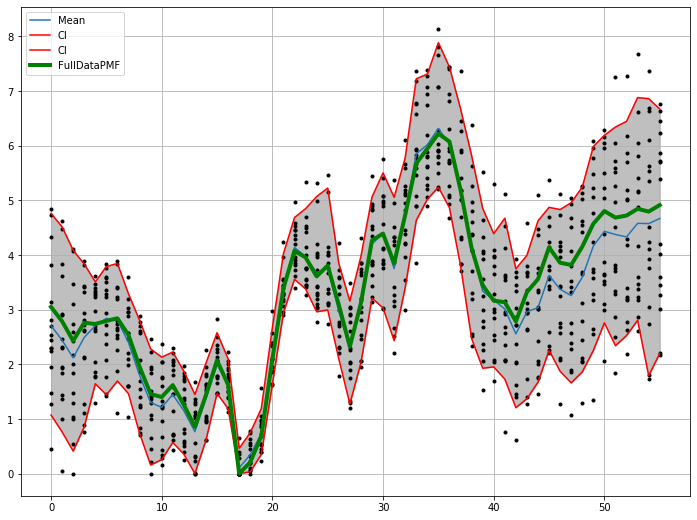

In [12]:
qLev=.9
qUkwds={'q':(1-qLev)/2.}
qLkwds={'q':qLev+(1-qLev)/2.}
potBootMeans=np.mean(potBootData,axis=0)
potBootUpper=np.array(list(map(
    lambda vec:np.quantile(vec,**qUkwds),np.array(potBootData).T))).T
potBootLower=np.array(list(map(
    lambda vec:np.quantile(vec,**qLkwds),np.array(potBootData).T))).T

piVec=QdataDict['piVec']
potVec=-np.log(piVec)-np.min(-np.log(piVec))

plt.figure(figsize=(12,9))
for iPiVec,piVec in enumerate(potBootData):
    plt.plot(piVec,'k.')
plt.plot(potBootMeans,label='Mean')
plt.plot(potBootUpper,'r',label='CI')
plt.plot(potBootLower,'r',label='CI')
plt.fill_between(np.arange(len(potBootMeans)),
                 potBootUpper,potBootLower,color='gray',alpha=.5)
plt.plot(potVec,'g',label='FullDataPMF',lw=4)
plt.grid()
plt.legend()
plt.show()

In [13]:
import qgrid

In [14]:
qgrid.show_grid(analysisFrame)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [24]:
potBootFrame=pd.DataFrame(potBootData,
             columns=['%02g'%ii for ii in np.arange(np.array(potBootData).shape[1])])
potBootFrame=pd.melt(potBootFrame,var_name='X_Index',value_name='Pot')
potBootFrame['X_Index']=pd.Series(potBootFrame['X_Index'],dtype=int)
potBootFrame.head()

,X_Index,Pot
0,0,0.446314
1,0,2.810036
2,0,1.475502
3,0,3.811328
4,0,2.536742


In [25]:
import seaborn as sns

In [50]:
@interact
def plot_bin_pot_dist(binLoc=widgets.IntSlider(
        min=potBootFrame['X_Index'].min(),
        max=potBootFrame['X_Index'].max()
    )):
    plt.figure(figsize=(12,9))
    sns.distplot(a=potBootFrame[potBootFrame['X_Index']==binLoc]['Pot'],
                 rug=True,bin)
    plt.show()

interactive(children=(IntSlider(value=0, description='binLoc', max=55), Output()), _dom_classes=('widget-inter…

In [51]:
?sns.distplot